### XGBoost
#### Afnan Rahman

XGBoost stands for e**X**treme **G**radient **B**oosting.

It is a tree-like ensemble model containing multiple decision trees.

We chose to use it for this project as the two research papers which we are referencing had the best results by using this type of model. We wanted to see if we could also get similar results in our reproduction efforts.


### Importing packages and data

In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from xgboost import XGBClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV, KFold, cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_recall_fscore_support as score, precision_score, recall_score, f1_score

In [2]:
data = pd.read_csv("https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_smote_data.csv")

### Base Model



In [25]:
X = data.drop('attrition', axis = 1)
y = data['attrition']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [8]:
X

,age,business_travel,daily_rate,department,distance_from_home,education,education_field,employee_number,environment_satisfaction,gender,hourly_rate,job_involvement,job_level,job_role,job_satisfaction,marital_status,monthly_rate,num_companies_worked,over_time,percent_salary_hike,performance_rating,relationship_satisfaction,stock_option_level,total_working_years,training_times_last_year,work_life_balance,years_at_company,years_in_current_role,years_with_curr_manager,rate_avg
0,41,2,1102,2,1,2,1,1,2,0,94,3,2,7,4,2,19479,8,1,11,3,1,0,8,0,1,6,4,5,6891.67
1,49,1,279,1,8,1,1,2,3,1,61,2,2,6,2,1,24907,1,0,23,4,4,1,10,3,3,10,7,7,8415.67
2,37,2,1373,1,2,2,4,4,4,1,92,2,1,2,3,2,2396,6,1,15,3,2,0,7,3,3,0,0,0,1287.00
3,33,1,1392,1,3,4,1,5,4,0,56,3,1,6,3,1,23159,1,1,11,3,3,0,8,3,3,8,7,0,8202.33
4,27,2,591,1,2,1,3,7,1,1,40,3,1,2,2,1,16632,9,0,12,3,4,1,6,3,3,2,2,2,5754.33
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2461,39,2,1053,1,7,2,2,1160,1,0,72,1,1,0,1,1,14504,4,0,13,3,1,0,12,2,2,1,0,0,5209.67
2462,32,0,453,1,11,2,3,998,3,1,43,2,1,4,1,1,10219,0,1,22,4,2,0,4,0,2,3,2,2,3571.67
2463,34,2,489,1,7,3,2,1729,3,1,59,2,2,4,1,1,5098,1,0,13,3,2,0,10,4,1,10,4,7,1882.00
2464,36,2,237,1,18,3,1,1080,1,0,49,2,1,5,2,1,11643,4,1,11,3,2,0,12,1,2,6,3,2,3976.33


In [9]:
model_xgb = XGBClassifier()
model_xgb.fit(X_train, y_train)

XGBClassifier()

In [10]:
# make predictions for test data
y_pred_xgb = model_xgb.predict(X_test)
predictions_xgb = [round(value) for value in y_pred_xgb]

# evaluate predictions
accuracy_xgb = accuracy_score(y_test, predictions_xgb)
print(round(accuracy_xgb*100.0, 2))

89.73


### Manual Feature Selection

In [11]:
cols = ['job_involvement', 'job_level', 'job_role', 'job_satisfaction', 'education_field', 'performance_rating', 'total_working_years']

In [12]:
#not including target variable in X 
manual_X = data.drop('attrition', axis=1)[cols]
manual_Y = data['attrition']

In [13]:
manual_X_train, manual_X_test, manual_Y_train, manual_Y_test = train_test_split(manual_X, manual_Y, test_size=0.3, random_state=42)

In [14]:
manual_xgb = XGBClassifier(random_state=42)
manual_xgb.fit(manual_X_train, manual_Y_train)

XGBClassifier(random_state=42)

In [15]:
manual_xgb_Y_pred = manual_xgb.predict(manual_X_test)

In [16]:
manual_xgb.score(manual_X_test, manual_Y_test)

0.8081081081081081

### Hyperparameter Tuning

#### Grid Search

##### **1st Run**: Accuracy 74%

In [ ]:
params = {"learning_rate"    : [0.05, 0.15, 0.25, 0.30 ] ,
 "max_depth"        : [3, 7, 11, 15],
 "min_child_weight" : [1, 3, 5, 7],
 "gamma"            : [0.0, 0.2, 0.4],
 "colsample_bytree" : [0.3, 0.5, 0.7] }

In [ ]:
xgb_best_model_1 = GridSearchCV(estimator=model_xgb, 
                   param_grid=params,
                   scoring='accuracy', 
                   verbose=1)
xgb_best_model_1.fit(X, y)

Fitting 5 folds for each of 576 candidates, totalling 2880 fits


GridSearchCV(estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.3, 0.5, 0.7],
                         'gamma': [0.0, 0.2, 0.4],
                         'learning_rate': [0.05, 0.15, 0.25, 0.3],
                         'max_depth': [3, 7, 11, 15],
                         'min_child_weight': [1, 3, 5, 7]},
             scoring='accuracy', verbose=1)

In [ ]:
xgb_best_model_1.best_estimator_

XGBClassifier(colsample_bytree=0.3, gamma=0.0, learning_rate=0.3, max_depth=11)

In [ ]:
xgb_best_model_1.best_score_

0.7372699575432573

#### **2nd Run:** Accuracy 76%

In [ ]:
params_updated = {"learning_rate": [ 0.30 , 0.50],
                  "max_depth": [11],
                  "min_child_weight": [1, 3, 5, 7],
                  "gamma": [0.0],
                  "colsample_bytree": [0.05, 0.1, 0.3] }

In [ ]:
xgb_best_model_2 = GridSearchCV(estimator=model_xgb, 
                   param_grid=params_updated,
                   scoring='accuracy', 
                   verbose=3)
xgb_best_model_2.fit(X, y)

In [ ]:
xgb_best_model_2.best_score_

0.762018050274696

In [ ]:
xgb_best_model_2.best_params_

{'colsample_bytree': 0.1,
 'gamma': 0.0,
 'learning_rate': 0.3,
 'max_depth': 11,
 'min_child_weight': 1}

In [ ]:
xgb_random_search = RandomizedSearchCV(model_xgb, param_distributions=params_updated, n_iter=50, scoring='accuracy', n_jobs=4, cv=50, verbose=3, random_state=42)
xgb_random_search.fit(X, y)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:296: UserWarning: The total space of parameters 24 is smaller than n_iter=50. Running 24 iterations. For exhaustive searches, use GridSearchCV.
  UserWarning,


Fitting 50 folds for each of 24 candidates, totalling 1200 fits


RandomizedSearchCV(cv=50, estimator=XGBClassifier(), n_iter=50, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.05, 0.1, 0.3],
                                        'gamma': [0.0],
                                        'learning_rate': [0.3, 0.5],
                                        'max_depth': [11],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
xgb_random_search.best_score_

0.9242367346938775

#### Tuning on unbalanced data

In [ ]:
unbalanced_data = pd.read_csv('https://raw.githubusercontent.com/afnanrahman/EAFP/main/data/clean_data.csv') 

In [ ]:
X_n = unbalanced_data.loc[:, unbalanced_data.columns != 'attrition']
y_n = unbalanced_data.loc[:,unbalanced_data.columns == 'attrition']
y_n= np.ravel(y_n)

In [ ]:
xgb_unbalanced = GridSearchCV(estimator=model_xgb, 
                   param_grid=params_updated,
                   scoring='accuracy', 
                   verbose=3)
xgb_unbalanced.fit(X_n, y_n)

In [ ]:
xgb_unbalanced.best_score_

0.8680272108843539

In [ ]:
xgb_random_search = RandomizedSearchCV(model_xgb, param_distributions=params_updated, n_iter=20, scoring='accuracy', n_jobs=4, cv=5, verbose=3, random_state=42)
xgb_random_search.fit(X_n, y_n)

Fitting 5 folds for each of 20 candidates, totalling 100 fits


RandomizedSearchCV(cv=5, estimator=XGBClassifier(), n_iter=20, n_jobs=4,
                   param_distributions={'colsample_bytree': [0.05, 0.1, 0.3],
                                        'gamma': [0.0],
                                        'learning_rate': [0.3, 0.5],
                                        'max_depth': [11],
                                        'min_child_weight': [1, 3, 5, 7]},
                   random_state=42, scoring='accuracy', verbose=3)

In [ ]:
xgb_random_search.best_score_

0.8680272108843539

### Model Metrics

In [ ]:
xgb_accuracies = []
xgb_precisions = []
xgb_recall = []
xgb_f1_score = []

kfold = KFold(n_splits=5, random_state=42, shuffle=True)

for train_index, test_index in kfold.split(X):
      X_train, X_test = X.iloc[train_index], X.iloc[test_index] 
      y_train, y_test = y[train_index], y[test_index]
      model_xgb.fit(X_train, y_train)
      y_pred_xgb = model_xgb.predict(X_test)

      # evaluate predictions
      accuracy_xgb = round(accuracy_score(y_test, y_pred_xgb), 4) 
      xgb_accuracies.append(round(accuracy_xgb, 4))

      precision = precision_score(y_test, y_pred_xgb)
      xgb_precisions.append(round(precision,4))

      recall = recall_score(y_test, y_pred_xgb)
      xgb_recall.append(round(recall,4))

      f1 = f1_score(y_test, y_pred_xgb)
      xgb_f1_score.append(round(f1,4))

      
print("Accuracies:" , xgb_accuracies )
print("Precisions:" , xgb_precisions)
print("Recalls:", xgb_recall)
print("f1_scores:" , xgb_f1_score)

Accuracies: [0.8947, 0.8864, 0.9006, 0.8742, 0.8479]
Precisions: [0.9068, 0.8947, 0.9187, 0.8452, 0.8582]
Recalls: [0.877, 0.8644, 0.8863, 0.9025, 0.855]
f1_scores: [0.8917, 0.8793, 0.9022, 0.873, 0.8566]


In [ ]:
print("Accuracy: %.2f%%" % (np.mean(xgb_accuracies)*100))
print("Precisions: %.2f%%" % (np.mean(xgb_precisions)*100))
print("Recall: %.2f%%" % (np.mean(xgb_recall)*100))
print("f1_score: %.2f%%" % (np.mean(xgb_f1_score)*100))

Accuracy: 88.08%
Precisions: 88.47%
Recall: 87.70%
f1_score: 88.06%


The code below is adapted from: https://www.kdnuggets.com/2020/05/model-evaluation-metrics-machine-learning.html

In [ ]:
labels = ['No Attrition', 'Attrition']
cm = confusion_matrix(y_test, y_pred_xgb)
print(cm)

[[194  37]
 [ 38 224]]


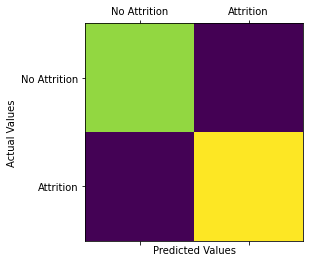

In [ ]:
fig = plt.figure()
ax = fig.add_subplot(111)
cax = ax.matshow(cm)
ax.set_xticklabels([''] + labels)
ax.set_yticklabels([''] + labels)
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

AUC - Test Set: 84.74%


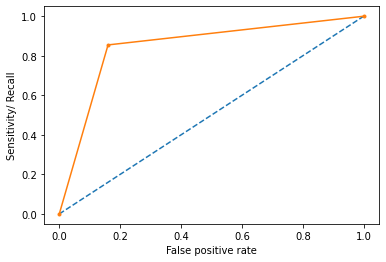

In [ ]:
auc = roc_auc_score(y_test, y_pred_xgb)
print('AUC - Test Set: %.2f%%' % (auc*100))

# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_xgb)

plt.plot([0, 1], [0, 1], linestyle='--')

# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
plt.xlabel('False positive rate')
plt.ylabel('Sensitivity/ Recall')
# show the plot
plt.show()